In [1]:
#
# Google Colab setup
#
#import os
#os.chdir("/content")
#!git clone https://github.com/Doctorado-ML/STree.git
#os.chdir("/content/STree")

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, load_iris, load_wine
from trees.Stree import Stree
from trees.Stree_grapher import Stree_grapher
import time

In [3]:
import os
if not os.path.isfile('data/creditcard.csv'):
    !wget --no-check-certificate --content-disposition http://nube.jccm.es/index.php/s/Zs7SYtZQJ3RQ2H2/download
    !tar xzf creditcard.tgz

In [4]:
import time
from sklearn.model_selection import train_test_split
from trees.Stree import Stree

random_state=1

def load_creditcard(n_examples=0):
    import pandas as pd
    import numpy as np
    import random
    df = pd.read_csv('data/creditcard.csv')
    print("Fraud: {0:.3f}% {1}".format(df.Class[df.Class == 1].count()*100/df.shape[0], df.Class[df.Class == 1].count()))
    print("Valid: {0:.3f}% {1}".format(df.Class[df.Class == 0].count()*100/df.shape[0], df.Class[df.Class == 0].count()))
    y = df.Class
    X = df.drop(['Class', 'Time', 'Amount'], axis=1).values
    if n_examples > 0:
        # Take first n_examples samples
        X = X[:n_examples, :]
        y = y[:n_examples, :]
    else:
        # Take all the positive samples with a number of random negatives
        if n_examples < 0:
            Xt = X[(y == 1).ravel()]
            yt = y[(y == 1).ravel()]
            indices = random.sample(range(X.shape[0]), -1 * n_examples)
            X = np.append(Xt, X[indices], axis=0)
            y = np.append(yt, y[indices], axis=0)
    print("X.shape", X.shape, " y.shape", y.shape)
    print("Fraud: {0:.3f}% {1}".format(len(y[y == 1])*100/X.shape[0], len(y[y == 1])))
    print("Valid: {0:.3f}% {1}".format(len(y[y == 0]) * 100 / X.shape[0], len(y[y == 0])))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=random_state, stratify=y)
    return Xtrain, Xtest, ytrain, ytest

data = load_creditcard(-500) # Take all true samples + 1000 of the others
# data = load_creditcard(5000)  # Take the first 5000 samples
#data = load_creditcard(0) # Take all the samples

Xtrain = data[0]
Xtest = data[1]
ytrain = data[2]
ytest = data[3]

Fraud: 0.173% 492
Valid: 99.827% 284315
X.shape (992, 28)  y.shape (992,)
Fraud: 49.798% 494
Valid: 50.202% 498


In [5]:
gr = Stree_grapher(dict(C=1, max_iter=5000))
gr.fit(Xtrain, ytrain)
print("Score train: ", gr.score(Xtrain, ytrain))
print("Score test: ", gr.score(Xtest, ytest))

Score train:  0.9394812680115274
Score test:  0.9429530201342282


In [6]:
print(gr)

root
root - Down
root - Down - Down
root - Down - Down - Down, <cgaf> - Leaf class=1 belief=0.990260 counts=(array([0, 1]), array([  3, 305]))
root - Down - Down - Up, <pure> - Leaf class=0 belief=1.000000 counts=(array([0]), array([2]))
root - Down - Up, <pure> - Leaf class=1 belief=1.000000 counts=(array([1]), array([1]))
root - Up
root - Up - Down, <pure> - Leaf class=1 belief=1.000000 counts=(array([1]), array([1]))
root - Up - Up, <cgaf> - Leaf class=0 belief=0.897906 counts=(array([0, 1]), array([343,  39]))



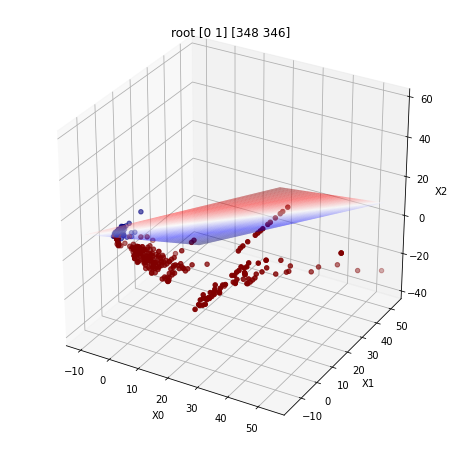

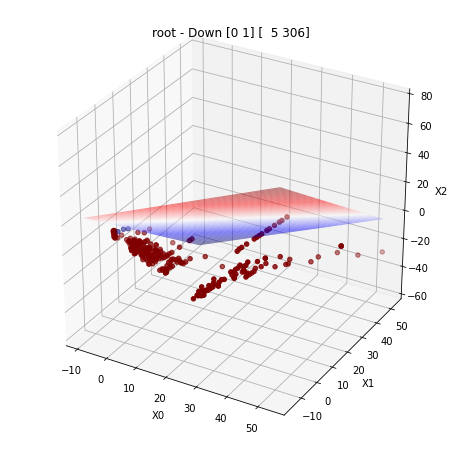

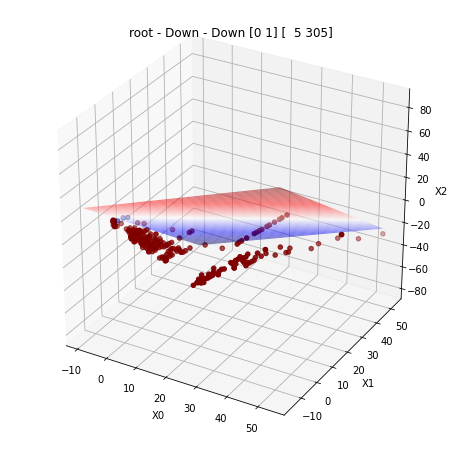

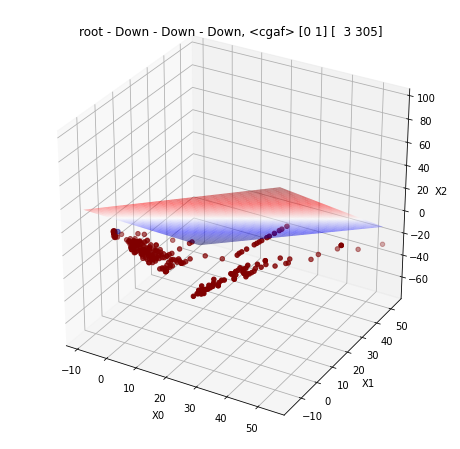

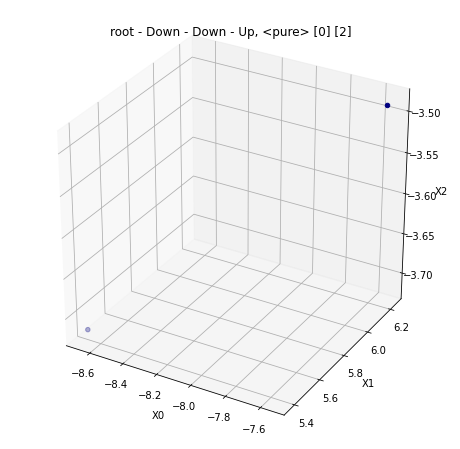

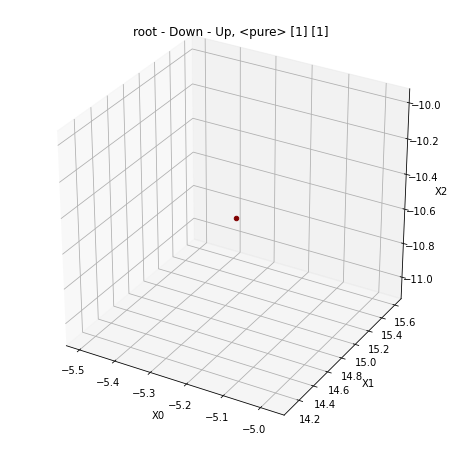

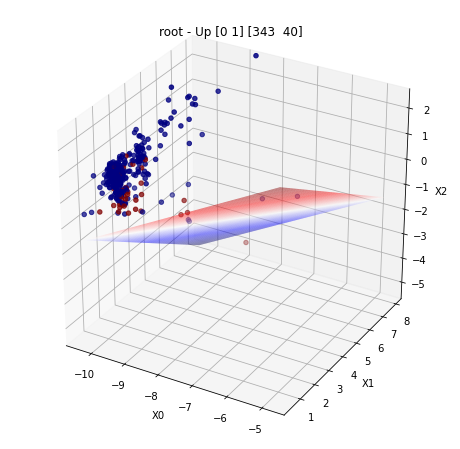

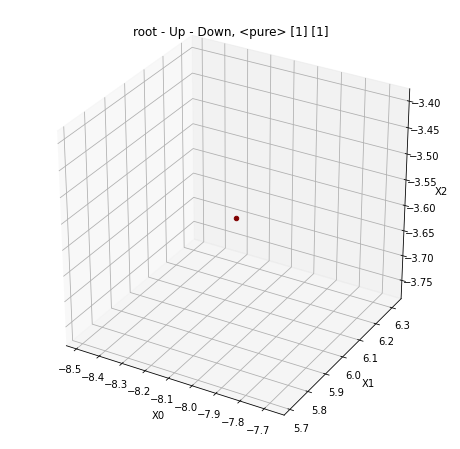

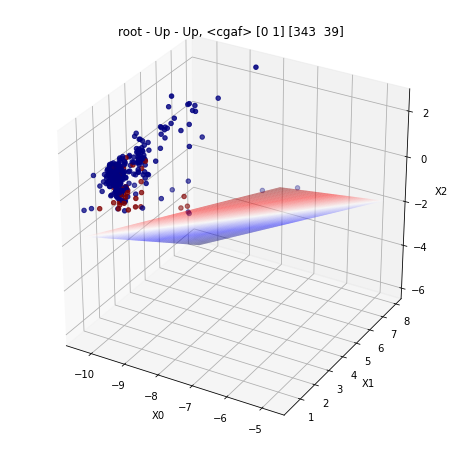

In [7]:
gr.plot_all()